# MLP -- solution

# Understanding the training loop 

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


### Download the data and print the sizes

In [0]:

import torchvision.datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Lambda(lambda x: x.squeeze()),  # Squeeze the data to remove the redundant channel dimension
                                ])

trainset = torchvision.datasets.FashionMNIST(root='./data_FashionMNIST',
                                      train=True,
                                      download=True,
                                      transform=transform
                                      )

testset = torchvision.datasets.FashionMNIST(root='./data_FashionMNIST',
                                     train=False,
                                     download=True,
                                     transform=transform
                                     )

classes = (
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
)


0it [00:00, ?it/s]

26427392it [00:04, 5982249.57it/s]                              


Extracting ./data_FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data_FashionMNIST/FashionMNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 38082.62it/s]                           
0it [00:00, ?it/s]

Extracting ./data_FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data_FashionMNIST/FashionMNIST/raw


4423680it [00:02, 1710254.35it/s]                            
0it [00:00, ?it/s]

Extracting ./data_FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data_FashionMNIST/FashionMNIST/raw


8192it [00:00, 14020.48it/s]            

Extracting ./data_FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data_FashionMNIST/FashionMNIST/raw
Processing...
Done!


In [0]:
print(trainset.data.shape)

torch.Size([60000, 28, 28])


### Make a ONE layer net class **without** softmax activation
We will use PyTorch's cross entropy loss function which expects the model outputs directly as it applies the softmax function internally


In [0]:
class OneLayerNet(nn.Module):

    def __init__(self, input_size, output_size):
        super(OneLayerNet , self).__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net

In [0]:
net=OneLayerNet(784,10)
print(net)

OneLayerNet(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Choose the criterion, optimizer. Set the batchize and learning rate to be:
### batchize = 50
### learning rate = 0.01

In [0]:
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD( net.parameters() , lr=0.01 )

bs=50

### Create DataLoaders that sample data from the dataset


In [0]:
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=bs,
                                          shuffle=True,
                                          drop_last=True
                                          )

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=bs,
                                         shuffle=True,
                                         drop_last=True
                                         )

### Complete the training loop 

In [0]:
for epoch in range(1, 5):
  for i, (minibatch_data, minibatch_label) in enumerate(trainloader):
      
      # Set dL/dU, dL/dV, dL/dW to be filled with zeros
      optimizer.zero_grad()
      
      #reshape the minibatch
      inputs = minibatch_data.view(bs,784)

      # forward the minibatch through the net  
      scores=net( inputs ) 
      
      # Compute the average of the losses of the data points in the minibatch
      loss = criterion(scores, minibatch_label) 
      
      # backward pass to compute dL/dU, dL/dV and dL/dW    
      loss.backward()
      
      # do one step of stochastic gradient descent: U=U-lr(dL/dU), V=V-lr(dL/dU), ...
      optimizer.step()

### Choose image at random from the test set and see how good/bad are the predictions

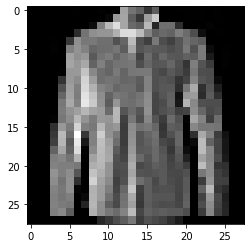

Confidence scores:
T-shirt/top : 0.017009196802973747
Trouser     : 0.0037563301157206297
Pullover    : 0.1580478549003601
Dress       : 0.015291848219931126
Coat        : 0.38834309577941895
Sandal      : 0.003068626392632723
Shirt       : 0.38767656683921814
Sneaker     : 0.00011068456660723314
Bag         : 0.026487698778510094
Ankle boot  : 0.00020815309835597873

Label with highest confidence score: Coat


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# choose a picture at random
im_minibatch, label_minibatch = iter(testloader).next()
im, label = im_minibatch[0], label_minibatch[0]

# Function to show an image tensor
def show(X):
    if X.dim() == 3 and X.size(2) == 3:
        plt.imshow(X.numpy())
        plt.show()
    elif X.dim() == 2:
        plt.imshow(   X.numpy() , cmap='gray'  )
        plt.show()
    else:
        print('WRONG TENSOR SIZE')

# diplay the picture
show(im)

# feed it to the net and display the confidence scores
prob = F.softmax(net( im.view(1,784)), dim=1)

print('Confidence scores:\n' + '\n'.join(['{:12s}: {}'.format(classes[i], p.item()) for i, p in enumerate(prob.squeeze())]))

print('\nLabel with highest confidence score: {}'.format(classes[torch.argmax(prob).item()]))
